In [5]:
import os
import torch
from torch.optim import Adam
from torchvision import datasets, transforms
from network import Autoencoder, Conv_Autoencoder, add_white_noise
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


# Task 1

Epoch [1/50], Training Loss: 0.1697
Epoch [2/50], Training Loss: 0.1109
Epoch [3/50], Training Loss: 0.1021
Epoch [4/50], Training Loss: 0.0931
Epoch [5/50], Training Loss: 0.0887
Epoch [6/50], Training Loss: 0.0863
Epoch [7/50], Training Loss: 0.0846
Epoch [8/50], Training Loss: 0.0834
Epoch [9/50], Training Loss: 0.0824
Epoch [10/50], Training Loss: 0.0816
Epoch [10/50], Test Loss: 0.0820


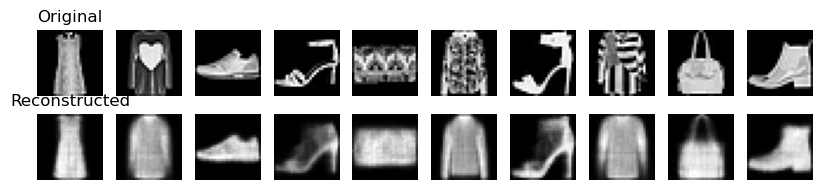

Epoch [11/50], Training Loss: 0.0810
Epoch [12/50], Training Loss: 0.0804
Epoch [13/50], Training Loss: 0.0800
Epoch [14/50], Training Loss: 0.0795
Epoch [15/50], Training Loss: 0.0792
Epoch [16/50], Training Loss: 0.0787
Epoch [17/50], Training Loss: 0.0783
Epoch [18/50], Training Loss: 0.0774
Epoch [19/50], Training Loss: 0.0764
Epoch [20/50], Training Loss: 0.0748
Epoch [20/50], Test Loss: 0.0755


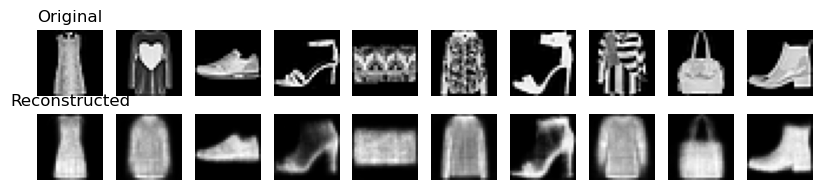

Epoch [21/50], Training Loss: 0.0735
Epoch [22/50], Training Loss: 0.0729
Epoch [23/50], Training Loss: 0.0723
Epoch [24/50], Training Loss: 0.0719
Epoch [25/50], Training Loss: 0.0716
Epoch [26/50], Training Loss: 0.0713
Epoch [27/50], Training Loss: 0.0710
Epoch [28/50], Training Loss: 0.0708
Epoch [29/50], Training Loss: 0.0706
Epoch [30/50], Training Loss: 0.0704
Epoch [30/50], Test Loss: 0.0711


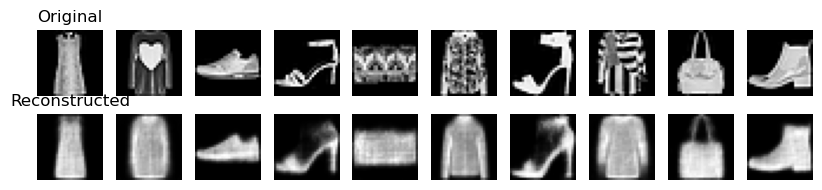

Epoch [31/50], Training Loss: 0.0703
Epoch [32/50], Training Loss: 0.0701
Epoch [33/50], Training Loss: 0.0699
Epoch [34/50], Training Loss: 0.0698
Epoch [35/50], Training Loss: 0.0696
Epoch [36/50], Training Loss: 0.0695
Epoch [37/50], Training Loss: 0.0695
Epoch [38/50], Training Loss: 0.0693
Epoch [39/50], Training Loss: 0.0692
Epoch [40/50], Training Loss: 0.0691
Epoch [40/50], Test Loss: 0.0704


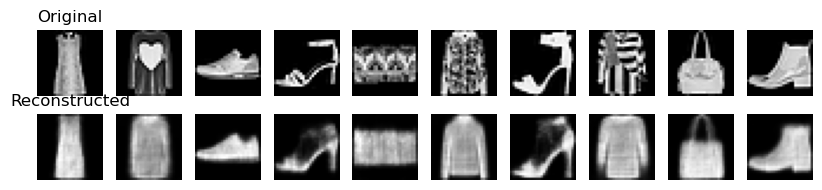

Epoch [41/50], Training Loss: 0.0690
Epoch [42/50], Training Loss: 0.0689
Epoch [43/50], Training Loss: 0.0688
Epoch [44/50], Training Loss: 0.0687
Epoch [45/50], Training Loss: 0.0687
Epoch [46/50], Training Loss: 0.0686
Epoch [47/50], Training Loss: 0.0685
Epoch [48/50], Training Loss: 0.0684
Epoch [49/50], Training Loss: 0.0683
Epoch [50/50], Training Loss: 0.0683
Epoch [50/50], Test Loss: 0.0696


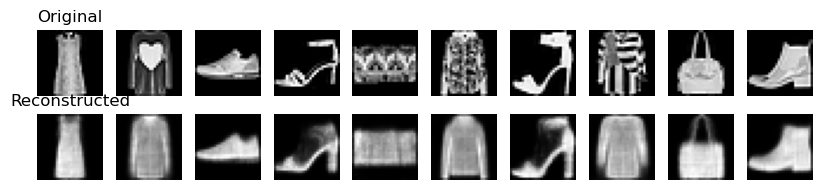

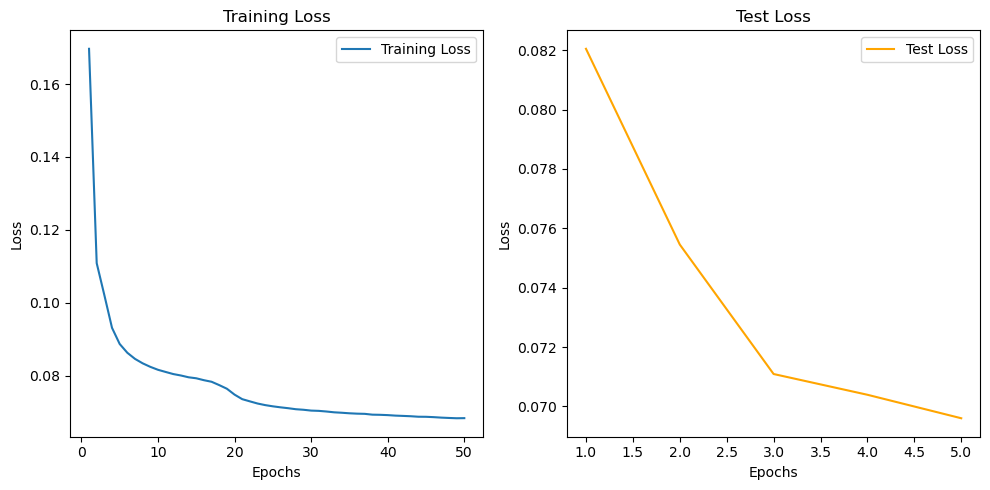

In [2]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
#Fashion MNIST image has form 1x1x28x28 (grayscale)

autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 50

# Lists to store loss values
train_losses = []
test_losses = []

# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data,_ in train_loader:
        img = data.to(device)
        img = img.view(img.size(0), -1)  # Flatten the images
        output = autoencoder(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every ten epochs
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for data,_ in test_loader:
                img = data.to(device)
                img = img.view(img.size(0), -1)  # Flatten the images
                output = autoencoder(img)
                loss = criterion(output, img)
                test_loss += loss.item()

        
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')
        img = img.detach().cpu().numpy()
        output = output.detach().cpu().numpy()
        fig, axes = plt.subplots(2, 10, figsize=(10, 2))
        for i in range(10):
            # Plot original images
            ax = axes[0, i]
            ax.imshow(img[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                    ax.set_title('Original')
                
            # Plot reconstructed images
            ax = axes[1, i]
            ax.imshow(output[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_title('Reconstructed')
        plt.show()


# Plot training and testing loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot testing loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 5 + 1), test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Task 2

Epoch [1/50], Training Loss: 0.1688
Epoch [2/50], Training Loss: 0.1029
Epoch [3/50], Training Loss: 0.0942
Epoch [4/50], Training Loss: 0.0905
Epoch [5/50], Training Loss: 0.0881
Epoch [6/50], Training Loss: 0.0865
Epoch [7/50], Training Loss: 0.0847
Epoch [8/50], Training Loss: 0.0828
Epoch [9/50], Training Loss: 0.0808
Epoch [10/50], Training Loss: 0.0794


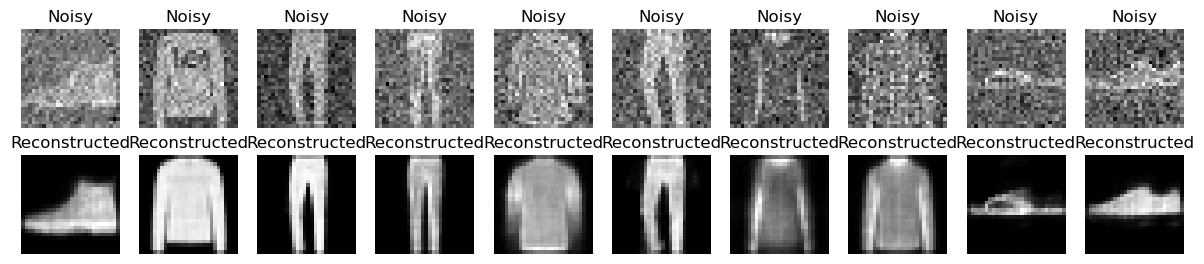

Epoch [10/50], Test Loss: 0.0794
Epoch [11/50], Training Loss: 0.0783
Epoch [12/50], Training Loss: 0.0776
Epoch [13/50], Training Loss: 0.0769
Epoch [14/50], Training Loss: 0.0763
Epoch [15/50], Training Loss: 0.0758
Epoch [16/50], Training Loss: 0.0753
Epoch [17/50], Training Loss: 0.0750
Epoch [18/50], Training Loss: 0.0746
Epoch [19/50], Training Loss: 0.0743
Epoch [20/50], Training Loss: 0.0739


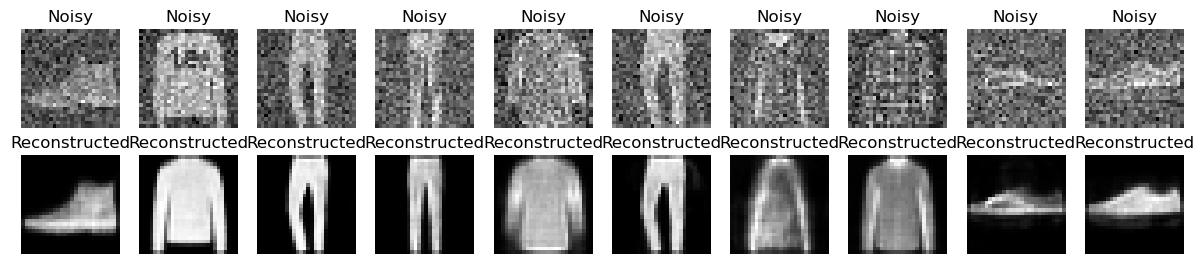

Epoch [20/50], Test Loss: 0.0742
Epoch [21/50], Training Loss: 0.0738
Epoch [22/50], Training Loss: 0.0736
Epoch [23/50], Training Loss: 0.0733
Epoch [24/50], Training Loss: 0.0731
Epoch [25/50], Training Loss: 0.0729
Epoch [26/50], Training Loss: 0.0728
Epoch [27/50], Training Loss: 0.0725
Epoch [28/50], Training Loss: 0.0724
Epoch [29/50], Training Loss: 0.0722
Epoch [30/50], Training Loss: 0.0718


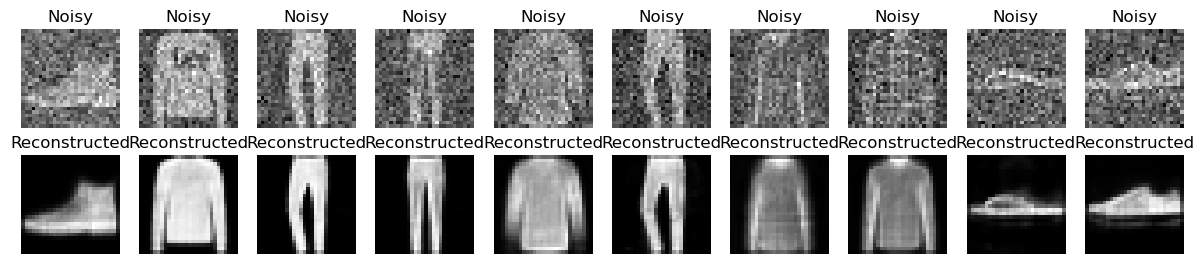

Epoch [30/50], Test Loss: 0.0722
Epoch [31/50], Training Loss: 0.0711
Epoch [32/50], Training Loss: 0.0704
Epoch [33/50], Training Loss: 0.0700
Epoch [34/50], Training Loss: 0.0695
Epoch [35/50], Training Loss: 0.0691
Epoch [36/50], Training Loss: 0.0689
Epoch [37/50], Training Loss: 0.0686
Epoch [38/50], Training Loss: 0.0683
Epoch [39/50], Training Loss: 0.0682
Epoch [40/50], Training Loss: 0.0682


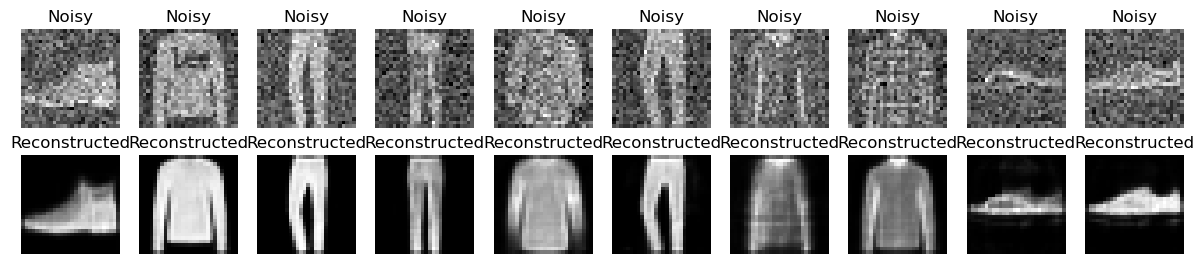

Epoch [40/50], Test Loss: 0.0688
Epoch [41/50], Training Loss: 0.0679
Epoch [42/50], Training Loss: 0.0678
Epoch [43/50], Training Loss: 0.0676
Epoch [44/50], Training Loss: 0.0675
Epoch [45/50], Training Loss: 0.0675
Epoch [46/50], Training Loss: 0.0673
Epoch [47/50], Training Loss: 0.0673
Epoch [48/50], Training Loss: 0.0672
Epoch [49/50], Training Loss: 0.0671
Epoch [50/50], Training Loss: 0.0671


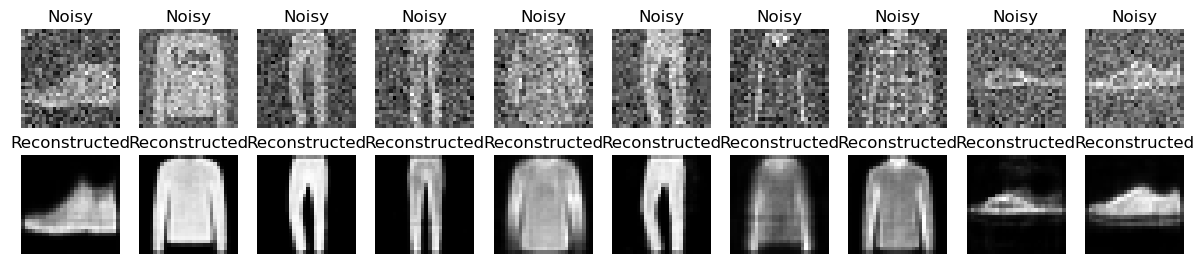

Epoch [50/50], Test Loss: 0.0674


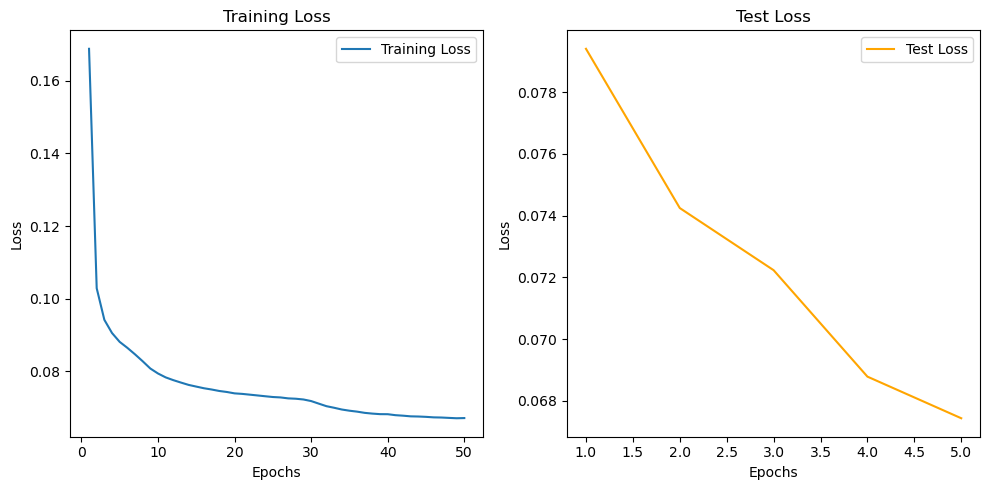

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
#Fashion MNIST image has form 1x1x28x28 (grayscale)

autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 50

train_losses = []
test_losses = []
# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)  # Flatten the images
        noisy_img = add_white_noise(img).to(device)       # Add noise to the images
        output = autoencoder(noisy_img)
        loss = criterion(output, img)    # Compute loss with respect to original images
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every ten epochs
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for k,(data,_) in enumerate(test_loader):
                img = data
                img = img.view(img.size(0), -1).to(device)  # Flatten the images
                noisy_img = add_white_noise(img).to(device)       # Add noise to the images
                output = autoencoder(noisy_img)
                loss = criterion(output, img)    # Compute loss with respect to original images
                test_loss += loss.item()
                if k==0:
                    outputs = output.view(-1, 1, 28, 28).cpu()
                    noisy_data = noisy_img.view(-1, 1, 28, 28).cpu()
                    
                    fig, axes = plt.subplots(2, 10, figsize=(15, 3))
                    for j in range(10):
                        axes[0, j].imshow(noisy_data[j].squeeze(), cmap='gray')
                        axes[0, j].set_title("Noisy")
                        axes[0, j].axis('off')
                        
                        axes[1, j].imshow(outputs[j].squeeze(), cmap='gray')
                        axes[1, j].set_title("Reconstructed")
                        axes[1, j].axis('off')
                    
                    plt.show()
            
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')
        
# Plot training and testing loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot testing loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 5 + 1), test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend()

plt.tight_layout()
plt.show()

The performance on the dataset with the noise is a little worse (1% more loss) which is to be expected when considering that the task at hand is more complex. Initially the training loss is also higher on the noisy training. But of course the quality of the reconstruction improves with each passing epoch and the loss continues to decrease.

# Task 3

Epoch [1/50], Training Loss: 0.1433
Epoch [2/50], Training Loss: 0.0818
Epoch [3/50], Training Loss: 0.0736
Epoch [4/50], Training Loss: 0.0696
Epoch [5/50], Training Loss: 0.0666
Epoch [6/50], Training Loss: 0.0643
Epoch [7/50], Training Loss: 0.0625
Epoch [8/50], Training Loss: 0.0610
Epoch [9/50], Training Loss: 0.0597
Epoch [10/50], Training Loss: 0.0587
Epoch [10/50], Test Loss: 0.0590


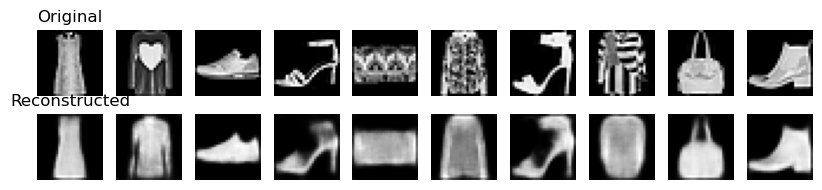

Epoch [11/50], Training Loss: 0.0577
Epoch [12/50], Training Loss: 0.0570
Epoch [13/50], Training Loss: 0.0562
Epoch [14/50], Training Loss: 0.0558
Epoch [15/50], Training Loss: 0.0551
Epoch [16/50], Training Loss: 0.0547
Epoch [17/50], Training Loss: 0.0543
Epoch [18/50], Training Loss: 0.0540
Epoch [19/50], Training Loss: 0.0537
Epoch [20/50], Training Loss: 0.0534
Epoch [20/50], Test Loss: 0.0549


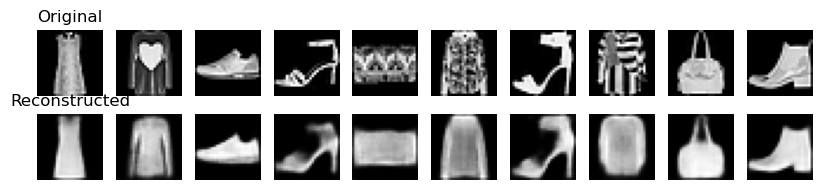

Epoch [21/50], Training Loss: 0.0531
Epoch [22/50], Training Loss: 0.0529
Epoch [23/50], Training Loss: 0.0527
Epoch [24/50], Training Loss: 0.0525
Epoch [25/50], Training Loss: 0.0523
Epoch [26/50], Training Loss: 0.0522
Epoch [27/50], Training Loss: 0.0521
Epoch [28/50], Training Loss: 0.0518
Epoch [29/50], Training Loss: 0.0518
Epoch [30/50], Training Loss: 0.0516
Epoch [30/50], Test Loss: 0.0526


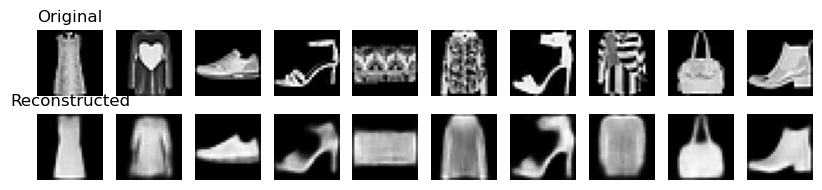

Epoch [31/50], Training Loss: 0.0516
Epoch [32/50], Training Loss: 0.0514
Epoch [33/50], Training Loss: 0.0513
Epoch [34/50], Training Loss: 0.0512
Epoch [35/50], Training Loss: 0.0513
Epoch [36/50], Training Loss: 0.0511
Epoch [37/50], Training Loss: 0.0511
Epoch [38/50], Training Loss: 0.0509
Epoch [39/50], Training Loss: 0.0508
Epoch [40/50], Training Loss: 0.0509
Epoch [40/50], Test Loss: 0.0522


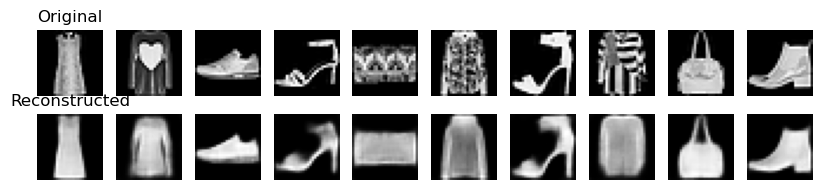

Epoch [41/50], Training Loss: 0.0507
Epoch [42/50], Training Loss: 0.0507
Epoch [43/50], Training Loss: 0.0508
Epoch [44/50], Training Loss: 0.0506
Epoch [45/50], Training Loss: 0.0506
Epoch [46/50], Training Loss: 0.0505
Epoch [47/50], Training Loss: 0.0505
Epoch [48/50], Training Loss: 0.0505
Epoch [49/50], Training Loss: 0.0504
Epoch [50/50], Training Loss: 0.0503
Epoch [50/50], Test Loss: 0.0511


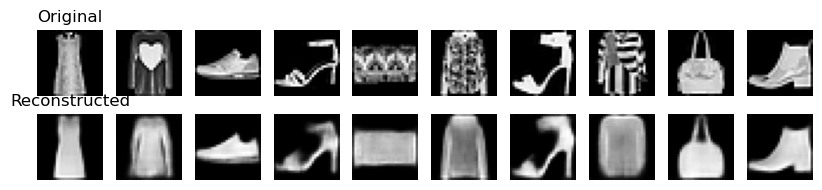

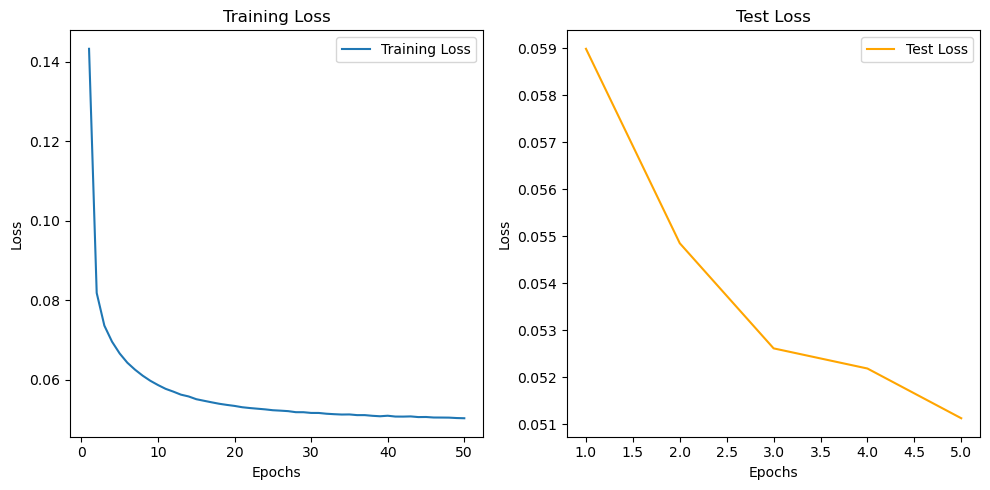

In [4]:
# Data loading and transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Model, loss function, and optimizer
autoencoder = Conv_Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 50


# Lists to store loss values
train_losses = []
test_losses = []

# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data, _ in train_loader:
        img = data.to(device)
        output = autoencoder(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every 10 epoch
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for data, _ in test_loader:
                img = data.to(device)
                #img = img.view(img.size(0), -1)  # Flatten the images      # Add noise to the images
                output = autoencoder(img)
                loss = criterion(output, img)    # Compute loss with respect to original images
                test_loss += loss.item()
        
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')

        img = img.detach().cpu().numpy()
        output = output.detach().cpu().numpy()
        fig, axes = plt.subplots(2, 10, figsize=(10, 2))
        for i in range(10):
            # Plot original images
            ax = axes[0, i]
            ax.imshow(img[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_title('Original')
                
            # Plot reconstructed images
            ax = axes[1, i]
            ax.imshow(output[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_title('Reconstructed')
        plt.show()

# Plot training and testing loss
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot testing loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 5 + 1), test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend()

plt.tight_layout()
plt.show()

The loss on the convolutional autoencoder is lower compared to the linear autoencoder. Reasons for that is the ability of conv. autoencoders to capture the local spatial structures. We also have translation invariance with conv. autoencoder which results to better recognition of the image regardless of the shift of the image. There are also fewer parameters in the conv. autoencoder which results on better generalization.   